# Apple Stock Price baseline models

In [31]:
import warnings
warnings.filterwarnings('ignore')

from datetime import date
import math

import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
START = '2015-01-01'
END = date.today().strftime("%Y-%m-%d")

<h4>Load Apple stock data into a dataframe

In [3]:
df_AAPL = web.DataReader('AAPL', data_source='yahoo', start=START, end=END)

<h4>Exploring dataset

In [4]:
df_AAPL.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.8475,27.332500,212818400.0,24.941502
2015-01-05,27.162500,26.352501,27.0725,26.562500,257142000.0,24.238857
2015-01-06,26.857500,26.157499,26.6350,26.565001,263188400.0,24.241146


<h3>Forecast Stock Price

In [5]:
data = df_AAPL.filter(['Close'])
data.shape

(1430, 1)

In [6]:
# Difine the size of the samples
TRAIN_SIZE = math.trunc(data.shape[0] * .9)
TEST_SIZE = data.shape[0] - TRAIN_SIZE

<h4>Split data into train and test

In [7]:
train = data.iloc[0:TRAIN_SIZE,:]
test = data.iloc[TRAIN_SIZE:len(data),:]

x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, len(data)))

In [8]:
x_train.shape

(1287,)

In [9]:
x_test.shape

(143,)

<h4>Plot splitted data

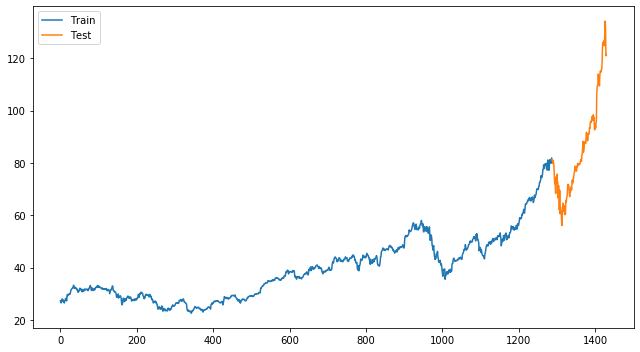

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_train, train, label='Train')
ax.plot(x_test, test, label='Test')
ax.legend()
plt.tight_layout()

<h3>Define error metrics

<h4>MSE (mean square error)

In [11]:
def mse(y_true, y_pred):
    return round(((y_true - y_pred) ** 2).sum() / y_true.size, 2)

<h4>MAPE (Mean Absolute Percentage Error)

In [12]:
def mape(y_true, y_pred):
    return round(100*(np.abs(y_true - y_pred) / y_true).sum() / y_true.size, 2)

<h4>Calculate different moving average

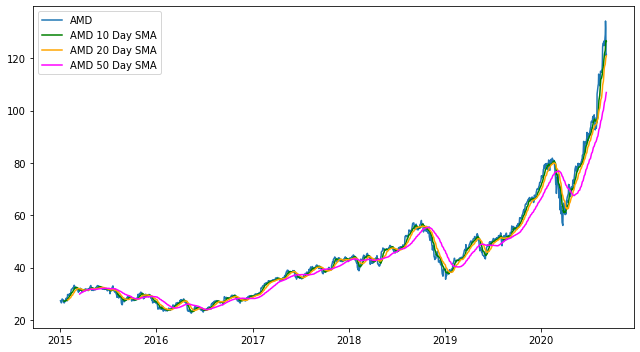

In [13]:
# Prediction using moving average
rolling_mean10 = data.rolling(window=10).mean()
rolling_mean20 = data.rolling(window=20).mean()
rolling_mean50 = data.rolling(window=50).mean()

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(data.index, data, label='AMD')
ax.plot(data.index, rolling_mean10, label='AMD 10 Day SMA', color='green')
ax.plot(data.index, rolling_mean20, label='AMD 20 Day SMA', color='orange')
ax.plot(data.index, rolling_mean50, label='AMD 50 Day SMA', color='magenta')
ax.legend(loc='upper left')
plt.tight_layout()

<h4>Errors with different rolling means

In [14]:
MSE_error = mse(train['Close'].iloc[10:], rolling_mean10['Close'])
MAPE_error = mape(train['Close'].iloc[10:], rolling_mean10['Close'])

print('Error with 10 rolling mean\n')
print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Error with 10 rolling mean

Apple Mean Squared Error is 1.15
Apple Mean Absolute Percentage Error is 1.99


In [15]:
MSE_error = mse(train['Close'].iloc[20:], rolling_mean20['Close'])
MAPE_error = mape(train['Close'].iloc[20:], rolling_mean20['Close'])

print('Error with 20 rolling mean\n')
print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Error with 20 rolling mean

Apple Mean Squared Error is 2.88
Apple Mean Absolute Percentage Error is 3.2


In [16]:
MSE_error = mse(train['Close'].iloc[50:], rolling_mean50['Close'])
MAPE_error = mape(train['Close'].iloc[50:], rolling_mean50['Close'])

print('Error with 50 rolling mean\n')
print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Error with 50 rolling mean

Apple Mean Squared Error is 9.8
Apple Mean Absolute Percentage Error is 5.58


<h3>Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train.reshape(-1,1), train)

LinearRegression()

In [18]:
# Prediction
y_pred_lr = lr_model.predict(x_test.reshape(-1,1)) 

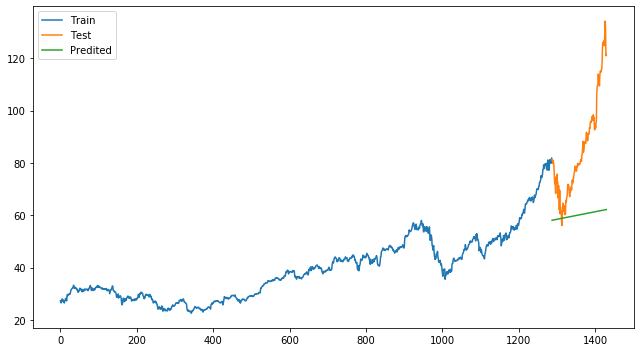

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_train, train, label='Train')
ax.plot(x_test, test, label='Test')
ax.plot(x_test, y_pred_lr, label='Predited')
ax.legend()
plt.tight_layout()

<h4>Error with Linear Regession

In [20]:
MSE_error = mse(test['Close'].values, y_pred_lr)
MAPE_error = mape(test['Close'].values, y_pred_lr)

print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Apple Mean Squared Error is 143282.7
Apple Mean Absolute Percentage Error is 3825.77


<h3>Weighted Linear Regression

In [21]:
lr_model_w = LinearRegression()
lr_model_w.fit(x_train.reshape(-1,1), train, sample_weight = [i**2 for i in x_train])

LinearRegression()

In [22]:
y_pred_lr_w = lr_model_w.predict(x_test.reshape(-1, 1))

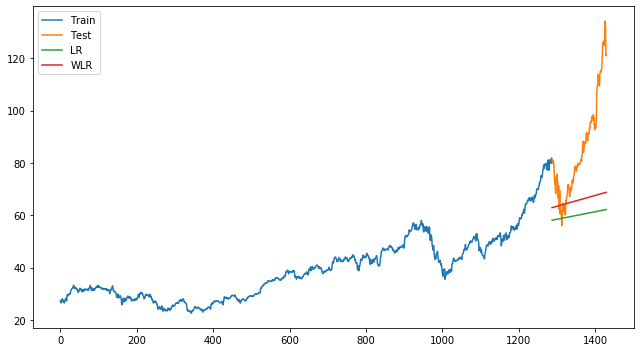

In [23]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_train, train, label='Train')
ax.plot(x_test, test, label='Test')
ax.plot(x_test, y_pred_lr, label='LR')
ax.plot(x_test, y_pred_lr_w, label='WLR')
ax.legend()
plt.tight_layout()

<h4>Error with Weighted Linear Regression

In [24]:
MSE_error = mse(test['Close'].values, y_pred_lr_w)
MAPE_error = mape(test['Close'].values, y_pred_lr_w)

print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Apple Mean Squared Error is 106681.45
Apple Mean Absolute Percentage Error is 3053.54


<h3>Analysing the TS

<h4>Check if the series is stationary</h4><br><p>The series is stationary if it has constant statistical properties over time</p><br><li>constant mean</li><li>constant variance</li><li>an autocovariance that does not depend on time</li>

In [25]:
# Apply DickeyFuller test to check satationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.810690853230783
p-value: 0.9983699866296452
Critical Values:
	1%: -3.4354771386691763
	5%: -2.8638041921002126
	10%: -2.5679754757164095


<p>* The serie is not stationary due to p-value is higher than 0.05

<h4>Make the serie stationary

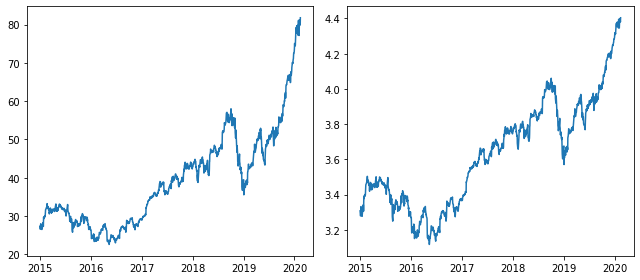

In [26]:
# Apply log to remove heteroscedasticity
train_log = np.log(train['Close'])
fig, ax = plt.subplots(1,2, figsize=(9, 4))
ax[0].plot(train)
ax[1].plot(train_log)
plt.tight_layout()

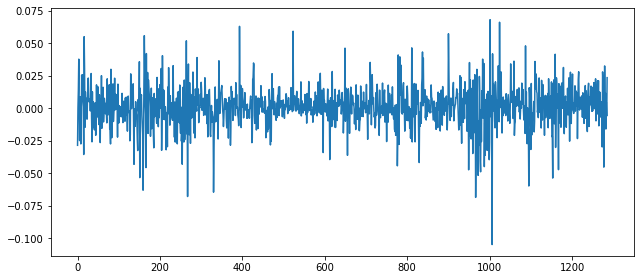

In [27]:
# Create a differenciate series to remove trend and seasonality
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(last_ob, value):
    return value + last_ob

train_diff = difference(train_log)

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(train_diff)
plt.tight_layout()

In [28]:
# Check stationarity of timeseries again

result = adfuller(train_diff)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -10.718966175058064
p-value: 3.187138833232282e-19
Critical Values:
	1%: -3.4354811617704835
	5%: -2.8638059672175684
	10%: -2.5679764210546328


<p>* Now we can see the timeserie is stationary due to p-value is smaller than 0.05

<h4>Autocorrelation and partial autocorrelation plots

<li>Significatives Autocorrelation lags determine the MA degree</li>
<li>Significatives PartialAutocorrelation lags determine the AR degree</li>

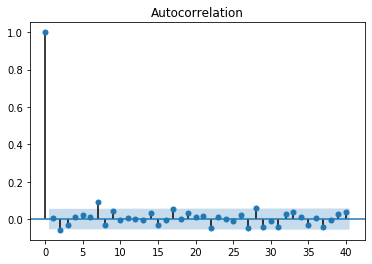

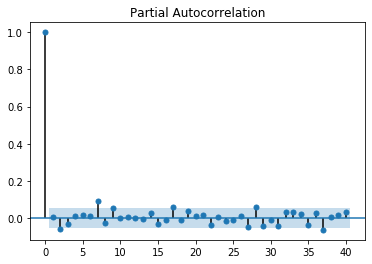

In [29]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(train_diff, lags=40)
sm.graphics.tsa.plot_pacf(train_diff, lags=40)
plt.show()

<h3>Applying ARIMA model

In [32]:
from statsmodels.tsa.arima_model import ARIMA

training_data = train['Close'].values
test_data = test['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

<IPython.core.display.Javascript object>


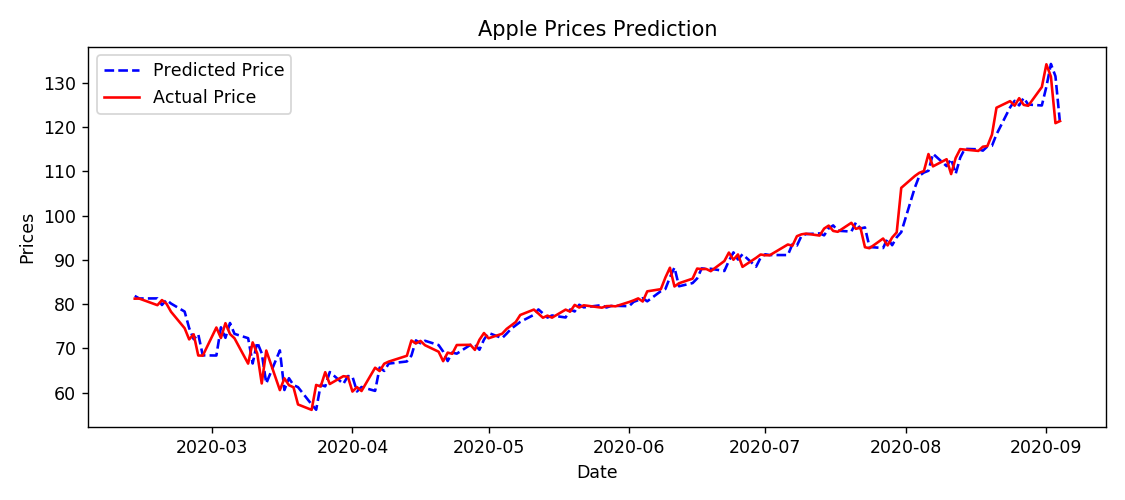

In [33]:
test_set_range = test.index

fig, ax = plt.subplots(1,1, figsize=(9, 4))
ax.plot(test_set_range, model_predictions, color='blue', linestyle='dashed',label='Predicted Price')
ax.plot(test_set_range, test, color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.tight_layout()

In [32]:
MSE_error = mse(test_data, model_predictions)
MAPE_error = mape(test_data, model_predictions)

print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Apple Mean Squared Error is 99771.94
Apple Mean Absolute Percentage Error is 3493.08


<h3>Applying LSTM model

<h4>Prepare train data to use in the LSTM model

In [40]:
# Split train sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [41]:
timeseries = train['Close'].values
n_steps = 15
n_features = 1

In [42]:
X, y = split_sequence(timeseries, n_steps)

In [43]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))

<h4>Vanilla LSTM model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mse')

In [45]:
# fit model
lstm_model.fit(X, y, epochs=100, verbose=0)

<h4>Bidirectional model

In [46]:
from tensorflow.keras.layers import Bidirectional

# define model
bi_model = Sequential()
bi_model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
bi_model.add(Dense(1))
bi_model.compile(optimizer='adam', loss='mse')

In [47]:
# fit model
bi_model.fit(X, y, epochs=100, verbose=0)

<h4>Test prediction

In [48]:
# Data to predict
num_val_predict = test.shape[0] + n_steps
num_val_predict

158

In [49]:
# Prediction for test data

x_input = train.values[-n_steps:].flatten()
temp_input = list(x_input)
output = []
i = 0
while(i < num_val_predict):
    
    if(len(temp_input) > n_steps):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = lstm_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        output.append(yhat[0][0])
        i += 1
    else: # Just enter the first loop
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = lstm_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        output.append(yhat[0][0])
        i += 1

<h4>Plot the Actual and Predicted Price

<IPython.core.display.Javascript object>


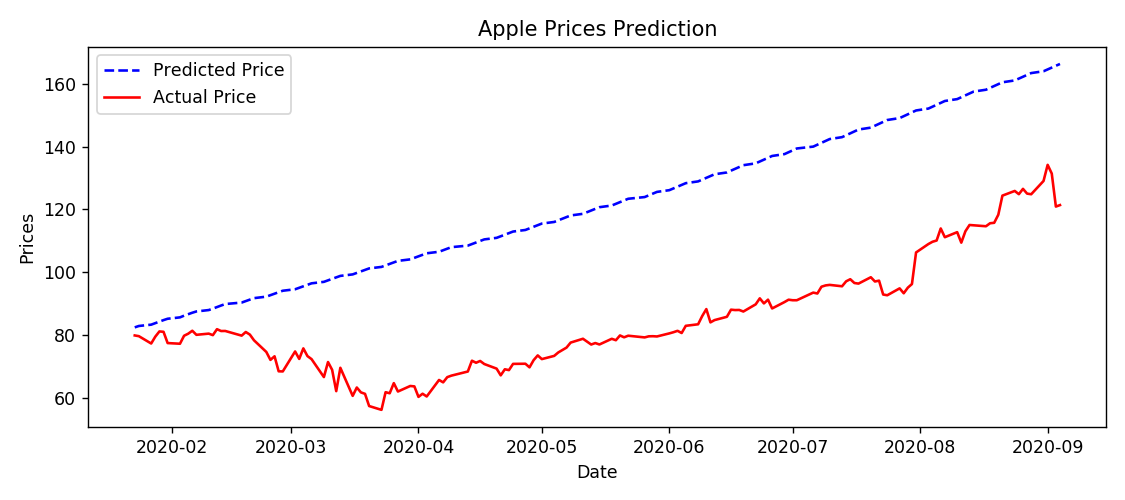

In [50]:
test_range = data.iloc[-num_val_predict:].index
test = data.iloc[-num_val_predict:]
test = test['Close'].values

fig, ax = plt.subplots(1,1, figsize=(9, 4))
ax.plot(test_range, output, color='blue', linestyle='dashed',label='Predicted Price')
ax.plot(test_range, test, color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.tight_layout()

In [51]:
MSE_error = mse(test, output)
MAPE_error = mape(test, output)

print('Apple Mean Squared Error is {}'.format(MSE_error))
print('Apple Mean Absolute Percentage Error is {}'.format(MAPE_error))

Apple Mean Squared Error is 1555.02
Apple Mean Absolute Percentage Error is 44.81
